# RDF

In [1]:
# Import libraries
from swolfpy_processmodels import RDF

import swolfpy as sp
import swolfpy_inputdata as spid
import swolfpy_processmodels as sppm

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy_financial as npf

# Set font for plots
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "12"

from IPython.display import Image

# Set specs for pandas
pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_rows', 500)
pd.set_option('display.precision', 2)

In [2]:
model = RDF()
model.calc()
report = model.report()

## Waste Products

In [3]:
Waste_products = pd.DataFrame(report['Waste']).transpose()
Waste_products

,Fe,Al,Separated_Organics,RDF,Other_Residual
Yard_Trimmings_Leaves,0.00,0.00,0.0,1.00,0.00
Yard_Trimmings_Grass,0.00,0.00,0.0,0.86,0.14
Yard_Trimmings_Branches,0.00,0.00,0.0,0.84,0.16
Food_Waste_Vegetable,0.00,0.00,0.0,0.86,0.14
Food_Waste_Non_Vegetable,0.00,0.00,0.0,0.91,0.09
Wood,0.00,0.00,0.0,0.83,0.17
Wood_Other,0.00,0.00,0.0,0.83,0.17
Textiles,0.00,0.00,0.0,1.00,0.00
Rubber_Leather,0.00,0.00,0.0,0.15,0.85
Newsprint,0.00,0.00,0.0,1.00,0.00


In [4]:
Waste_products.sum() / Waste_products.shape[0]

Fe                    0.04
Al                    0.06
Separated_Organics    0.00
RDF                   0.64
Other_Residual        0.26
dtype: float64

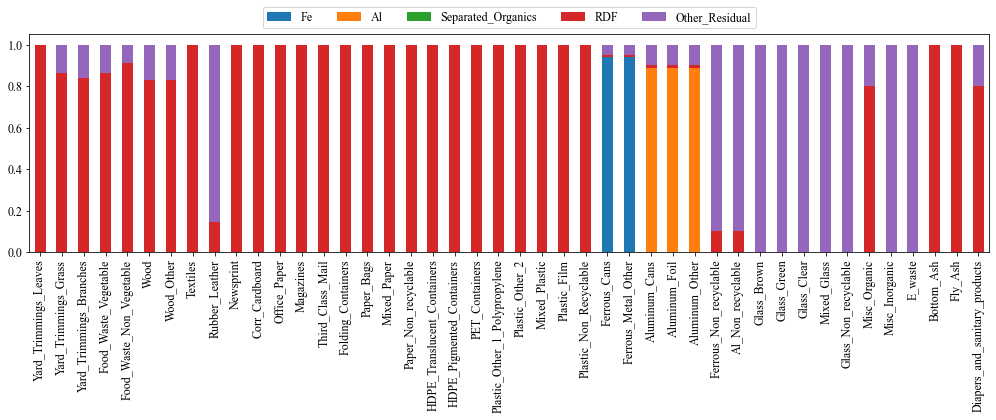

In [12]:
fig, ax = plt.subplots(figsize=(14, 6))
Waste_products.plot.bar(ax=ax, stacked=True)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=8)
fig.tight_layout()

### Cost & GHG emissions (excludes burdens/offsets from waste products)

In [6]:
project_name = 'demo'
common_data = spid.CommonData()
ProcessMetaData = sppm.ProcessModelsMetaData.ProcessModelsMetaData

Treatment_processes = {}
Treatment_processes['RDF'] = {'input_type':[] , 'model':sppm.RDF()}

# Distance
Processes = ['RDF']
data = sppm.Distance.create_distance_table(process_names=Processes,
                                           transport_modes=['Heavy Duty Truck'],
                                           default_dist=30)

distance = sppm.Distance(data)
demo = sp.Project(project_name, common_data, Treatment_processes, distance)
demo.init_project()
demo.write_project()
demo.group_exchanges()
newparam = []
demo.update_parameters(newparam)

Biosphere database already present!!! No setup is needed


Writing activities to SQLite3 database:


Vacuuming database 

                ####
                ++++++  Writing the Technosphere
                


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:15


Title: Writing activities to SQLite3 database:
  Started: 02/03/2022 12:29:08
  Finished: 02/03/2022 12:29:24
  Total time elapsed: 00:00:15
  CPU %: 51.10
  Memory %: 1.41


Writing activities to SQLite3 database:



              ####
              ++++++ Initializing the RDF
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 02/03/2022 12:29:25
  Finished: 02/03/2022 12:29:25
  Total time elapsed: 00:00:00
  CPU %: 151.20
  Memory %: 1.41

                  ####
                  ++++++ Writing the RDF_product
                  


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 02/03/2022 12:29:26
  Finished: 02/03/2022 12:29:26
  Total time elapsed: 00:00:00
  CPU %: 101.90
  Memory %: 1.42


Writing activities to SQLite3 database:



              ####
              ++++++ Writing the RDF
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 02/03/2022 12:29:26
  Finished: 02/03/2022 12:29:26
  Total time elapsed: 00:00:00
  CPU %: 71.70
  Memory %: 1.42

                  Grouping the exchanges with parameters in Database RDF
                  


<AxesSubplot:>

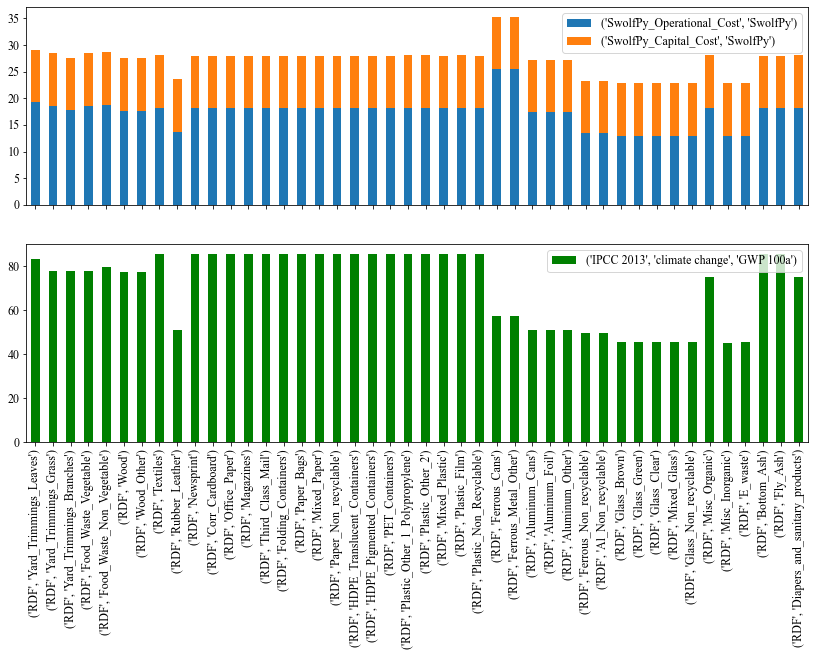

In [11]:
funtional_units = []
for w in common_data.Index:
    funtional_units.append({('RDF', w): 1})

impact_methods = [('IPCC 2013', 'climate change', 'GWP 100a'),
                  ('SwolfPy_Operational_Cost', 'SwolfPy'),
                  ('SwolfPy_Capital_Cost', 'SwolfPy'),
                  ('SwolfPy_Total_Cost', 'SwolfPy')]
LCA_results = demo.setup_LCA('SS_MRF', funtional_units, impact_methods)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)
LCA_results.iloc[:, [1, 2]].plot(kind='bar', stacked=True, ax=ax1)
LCA_results.iloc[:, [0]].plot(kind='bar', ax=ax2, color=['g'])

In [8]:
LCA_results

,"('IPCC 2013', 'climate change', 'GWP 100a')","('SwolfPy_Operational_Cost', 'SwolfPy')","('SwolfPy_Capital_Cost', 'SwolfPy')","('SwolfPy_Total_Cost', 'SwolfPy')"
"('RDF', 'Yard_Trimmings_Leaves')",83.24,19.26,9.89,29.15
"('RDF', 'Yard_Trimmings_Grass')",77.81,18.56,9.89,28.45
"('RDF', 'Yard_Trimmings_Branches')",77.86,17.77,9.89,27.66
"('RDF', 'Food_Waste_Vegetable')",77.81,18.56,9.89,28.45
"('RDF', 'Food_Waste_Non_Vegetable')",79.62,18.80,9.89,28.68
"('RDF', 'Wood')",77.58,17.68,9.89,27.56
"('RDF', 'Wood_Other')",77.58,17.68,9.89,27.56
"('RDF', 'Textiles')",85.54,18.16,9.89,28.05
"('RDF', 'Rubber_Leather')",51.15,13.73,9.89,23.61
"('RDF', 'Newsprint')",85.69,18.10,9.89,27.98
